In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
exam_df = pd.read_csv('datasets/exams.csv')

exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
78,female,group C,some high school,standard,none,87,87,85
48,male,group C,master's degree,standard,completed,95,89,90
71,male,group C,high school,standard,none,81,61,63
47,male,group E,some college,free/reduced,completed,96,94,90
75,male,group C,bachelor's degree,standard,completed,80,78,77


In [6]:
exam_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
exam_df.shape

(100, 8)

In [7]:
exam_df.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.730000,69.980000,69.140000
std,15.631395,13.732642,14.886792
min,18.000000,25.000000,20.000000
25%,58.000000,61.000000,62.000000
50%,69.000000,71.500000,69.000000
75%,78.250000,80.000000,81.000000
max,96.000000,94.000000,93.000000


In [9]:
from sklearn import preprocessing

exam_df[['math score']] = preprocessing.scale(exam_df[['math score']].astype('float64'))
exam_df[['reading score']] = preprocessing.scale(exam_df[['reading score']].astype('float64'))
exam_df[['writing score']] = preprocessing.scale(exam_df[['writing score']].astype('float64'))

In [10]:
exam_df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [12]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,0.210248,0.440580,-0.009452
1,female,group C,some college,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,high school,standard,none,0.531729,0.147836,-0.076964
3,female,group B,some college,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,bachelor's degree,standard,completed,0.017360,0.440580,0.733181


In [13]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.753353e-16,-3.004541e-16,-4.912737e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-3.133149e+00,-3.291909e+00,-3.317542e+00
25%,-5.613050e-01,-6.572107e-01,-4.820360e-01
50%,1.459522e-01,1.112428e-01,-9.451687e-03
75%,7.406911e-01,7.333242e-01,8.006929e-01
max,1.881947e+00,1.757929e+00,1.610838e+00


In [14]:
exam_df['parental level of education'].unique()

array(["associate's degree", 'some college', 'high school',
       "bachelor's degree", 'some high school', "master's degree"],
      dtype=object)

In [15]:
 exam_df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [16]:
parent_level_of_education = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

In [17]:
label_encoding = preprocessing.LabelEncoder()

label_encoding = label_encoding.fit(parent_level_of_education)

In [18]:
exam_df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [19]:
exam_df['parental level of education'] = \
    label_encoding.transform(exam_df['parental level of education'].astype(str))

In [20]:
exam_df.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int64
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [21]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,0,standard,none,0.210248,0.440580,-0.009452
1,female,group C,4,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,2,standard,none,0.531729,0.147836,-0.076964
3,female,group B,4,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,1,standard,completed,0.017360,0.440580,0.733181


In [22]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [23]:
exam_df = pd.get_dummies(exam_df, columns=['race/ethnicity'])

exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,0,standard,none,0.210248,0.440580,-0.009452,0,0,0,0,1
1,female,4,standard,none,-1.268562,-1.315885,-1.292181,0,0,1,0,0
2,male,2,standard,none,0.531729,0.147836,-0.076964,0,0,0,0,1
3,female,4,free/reduced,completed,-1.461450,-1.315885,-1.022132,0,1,0,0,0
4,female,1,standard,completed,0.017360,0.440580,0.733181,0,1,0,0,0


In [24]:
exam_df = pd.get_dummies(exam_df, columns=['gender',
                                           'lunch',
                                           'test preparation course'])

In [25]:
exam_df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,0.210248,0.440580,-0.009452,0,0,0,0,1,1,0,0,1,0,1
1,4,-1.268562,-1.315885,-1.292181,0,0,1,0,0,1,0,0,1,0,1
2,2,0.531729,0.147836,-0.076964,0,0,0,0,1,0,1,0,1,0,1
3,4,-1.461450,-1.315885,-1.022132,0,1,0,0,0,1,0,1,0,1,0
4,1,0.017360,0.440580,0.733181,0,1,0,0,0,1,0,0,1,1,0


In [26]:
from sklearn.model_selection import train_test_split

X = exam_df.drop('math score', axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [29]:
exam_df.sample(5)

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
28,5,0.210248,0.733324,0.868205,0,1,0,0,0,1,0,0,1,0,1
8,5,0.981802,0.806510,1.138253,0,1,0,0,0,1,0,0,1,1,0
80,1,0.210248,0.147836,0.058060,0,0,0,1,0,0,1,1,0,0,1
60,1,-1.268562,0.074650,-0.482036,0,0,1,0,0,1,0,1,0,0,1
7,4,-0.239824,0.513766,0.598157,0,0,1,0,0,1,0,0,1,0,1


In [30]:
x_train.shape, x_test.shape

((80, 14), (20, 14))

In [31]:
y_train.shape, y_test.shape

((80,), (20,))

### Linear regression with fit_intercept=True

In [32]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [33]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.8930644334722178


In [34]:
y_pred = linear_model.predict(x_test)

In [35]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.808559737599909


### Linear regression with fit_intercept=False

In [42]:
linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

In [43]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.8930644334722178


In [44]:
y_pred = linear_model.predict(x_test)

In [45]:
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.8085597375999102


In [46]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
83,-0.103910,0.403137
60,-0.945181,-1.268562
54,0.688561,0.917505
31,-0.649619,-0.239824
10,0.289947,-0.046936
45,0.261098,0.403137
5,-1.286852,-1.075674
43,-1.429968,-1.204266
18,-1.709551,-1.718635
51,-0.508541,-0.304121


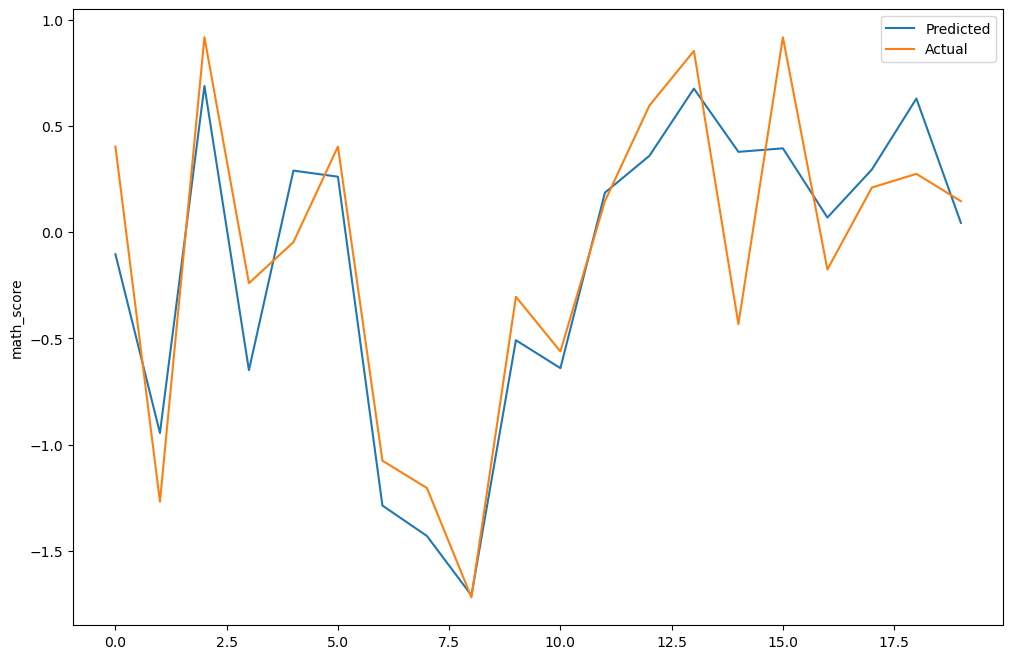

In [41]:
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('math_score')

plt.legend()
plt.show()

### Predict without using the reading or writing score

In [47]:
X = exam_df.drop(['math score', 'writing score', 'reading score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training_score : " , linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.336946355106309
Testing_score :  0.18016378968369406


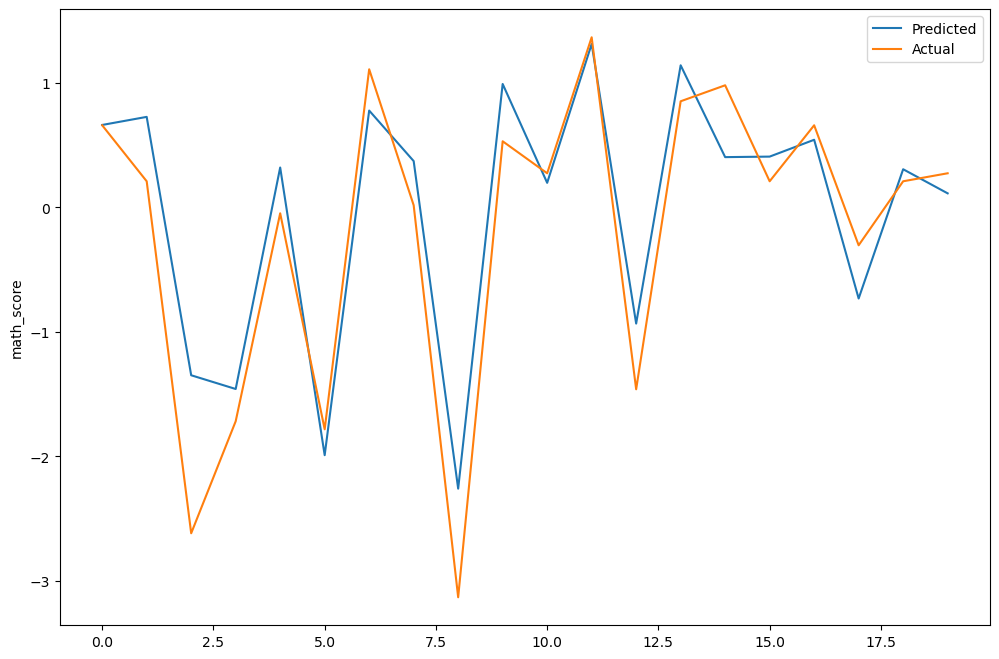

In [49]:
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('math_score')

plt.legend()
plt.show()

### Predict using only the reading score

In [48]:
X = exam_df.drop(['math score', 'writing score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training_score : " , linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.8177490579217886
Testing_score :  0.8589779341182965


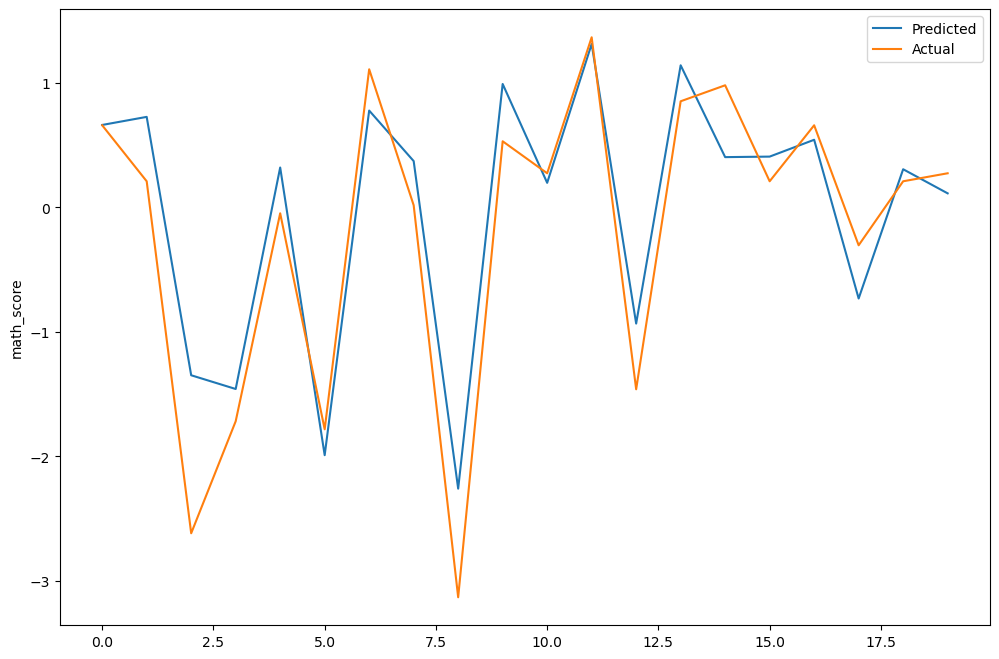

In [50]:
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('math_score')

plt.legend()
plt.show()